# TensorBoard

- Create variable to hold the global step


- Add the global step variable to the optimizer's minimize method


- Create operations that generate summary data


- Execute the operations in a session


- Print the summary data using FileWriter

The computations you'll use TensorFlow for - like training a massive deep neural network - can be complex and confusing. To make it easier to understand, debug, and optimize TensorFlow programs, we've included a suite of visualization tools called TensorBoard. 

You can use TensorBoard to visualize your TensorFlow graph, plot quantitative metrics about the execution of your graph, and show additional data like images that pass through it.

## Serializing the data

TensorBoard operates by reading TensorFlow events files, which contain summary data that you can generate when running TensorFlow. Here's the general lifecycle for summary data within TensorBoard.

First, create the TensorFlow graph that you'd like to collect summary data from, and decide which nodes you would like to annotate with the tf.summary operations.

For example, suppose you are training a convolutional neural network for recognizing MNIST digits. You'd like to record how the learning rate varies over time, and how the objective function is changing. Collect these by attaching tf.summary.scalar ops to the nodes that output the learning rate and loss respectively. Then, give each scalar_summary a meaningful tag, like 'learning rate' or 'loss function'.

## Merge All

Operations in TensorFlow don't do anything until you run them, or an op that depends on their output. And the summary nodes that we've just created are peripheral to your graph: none of the ops you are currently running depend on them. So, to generate summaries, we need to run all of these summary nodes. 

Managing them by hand would be tedious, so use tf.summary.merge_all to combine them into a single op that generates all the summary data.

## FileWriter
Then, you can just run the merged summary op, which will generate a serialized Summary protobuf object with all of your summary data at a given step. 

Finally, to write this summary data to disk, pass the summary protobuf to a tf.summary.FileWriter.

## Finished

The FileWriter takes a logdir in its constructor - this logdir is quite important, it's the directory where all of the events will be written out. Also, the FileWriter can optionally take a Graph in its constructor. If it receives a Graph object, then TensorBoard will visualize your graph along with tensor shape information. This will give you a much better sense of what flows through the graph: see Tensor shape information.

Now that you've modified your graph and have a FileWriter, you're ready to start running your network! If you want, you could run the merged summary op every single step, and record a ton of training data. That's likely to be more data than you need, though. Instead, consider running the merged summary op every n steps.

## Example

In [6]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import numpy as np
import tensorflow as tf

# Set constants
N = 1000
learn_rate = 0.1
batch_size = 40
num_batches = 400

# Step 1: Generate input points
x = np.random.normal(size=N)
m_real = np.random.normal(loc=0.5, scale=0.2, size=N)
b_real = np.random.normal(loc=1.0, scale=0.2, size=N)
y = m_real * x + b_real

# Step 2: Create variables and placeholders
m = tf.Variable(tf.random_normal([]))
b = tf.Variable(tf.random_normal([]))
gstep = tf.Variable(0, trainable=False) # variable will not be updated during training
x_holder = tf.placeholder(tf.float32, shape=[batch_size])
y_holder = tf.placeholder(tf.float32, shape=[batch_size])

# Step 3: Define model and loss
model = m * x_holder + b
loss = tf.reduce_mean(tf.pow(model - y_holder, 2))

# Step 4: Create optimizer
optimizer = tf.train.GradientDescentOptimizer(learn_rate).minimize(loss, 
                                             global_step=gstep) # add in global_step

# To display values in TensorBoard, you need to generate data in a special format called Summary Data
# Write to summary data
op1 = tf.summary.scalar('m', m) # meaningful tag
op2 = tf.summary.scalar('b', b) # meaningful tag
merged_op = tf.summary.merge_all()

# To print summary data to a file, you need to create a FileWriter with the name of the directory to store data
# Write to tensorboard
file_writer = tf.summary.FileWriter('./logs/training')

# Step 5: Execute optimizer in a session
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())

    # Perform training
    for batch in range(num_batches):

        # Create batch of data
        x_data = np.empty(batch_size)
        y_data = np.empty(batch_size)
        for i in range(batch_size):
            index = np.random.randint(0, N)
            x_data[i] = x[index]
            y_data[i] = y[index]
            
        # Execute these operations in a session
        _, summary, step = sess.run([optimizer, merged_op, gstep],
                    feed_dict={x_holder: x_data, y_holder: y_data})
        
        file_writer.add_summary(summary, global_step=step)
        file_writer.flush()

sess.end()

AttributeError: 'Session' object has no attribute 'end'

tensorboard --logdir=logs/training

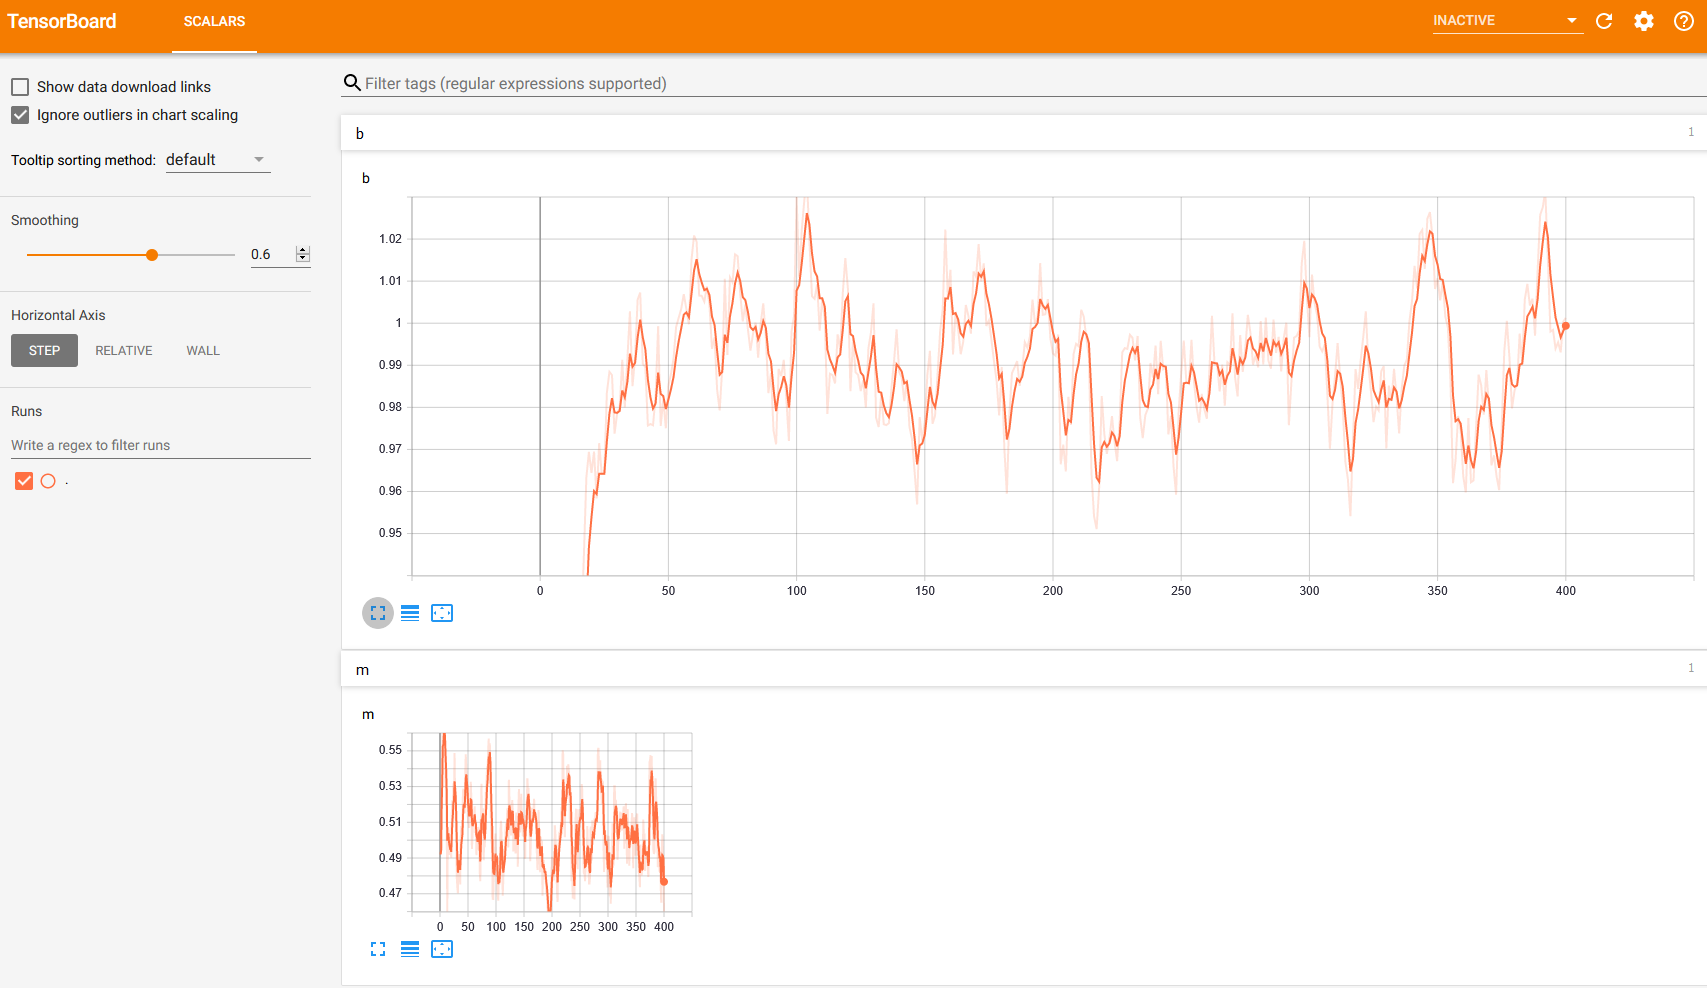

In [7]:
from PIL import Image
Image.open('Images/17-tb.png')